In [2]:
import cv2
# cv2构建时候的信息
print(cv2.getBuildInformation())


General configuration for OpenCV 4.2.0 =====================================
  Version control:               4.2.0

  Platform:
    Timestamp:                   2020-04-04T21:53:47Z
    Host:                        Windows 6.3.9600 AMD64
    CMake:                       3.16.2
    CMake generator:             Visual Studio 14 2015 Win64
    CMake build tool:            C:/Program Files (x86)/MSBuild/14.0/bin/MSBuild.exe
    MSVC:                        1900

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (14 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (27 files):           + SSSE3 SSE4_1 POP

In [8]:
## 加载图片
#读入一副彩色图像。图像的透明度会被忽略
# path 不能包含中文
img = cv2.imread('Task01/23xxxxxx.png', cv2.IMREAD_UNCHANGED)
rows, cols, ch = img.shape
print('行/高:',rows,'列/宽:',cols,'通道:',ch)

行/高: 327 列/宽: 426 通道: 4


In [9]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)#可以调整窗口大小
# cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)#自动调整
# cv2.namedWindow('image', cv2.WINDOW_KEEPRATIO)#保持图片比例

cv2.imshow('image', img)
# 在窗口上按任意键退出, 返回按键的ASCII编码
cv2.waitKey(delay=0)
cv2.destroyAllWindows()

In [3]:
# 输出
img = cv2.imread('Task01/23xxxxxx.png')
cv2.imshow('image', img)
k = cv2.waitKey(0)
# wait for ESC key to exit
if k == 27:
    cv2.destroyAllWindows()
# wait for 's' key to save and exit
elif k == ord('s'):
    cv2.imwrite('Task01/23-copy.png', img)
    cv2.destroyAllWindows()

(2,)


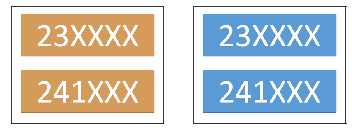

In [22]:
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread('Task01/23xxxxxx.png')
# 彩色图像使用 OpenCV 加载时是 BGR 模式。但是 Matplotlib 是 RGB 模式。
_, figs = plt.subplots(1, 2)
print(figs.shape)
figs[0].imshow(img)
figs[0].axes.get_xaxis().set_visible(False)
figs[0].axes.get_yaxis().set_visible(False)
img2 = cv2.imread('Task01/23xxxxxx.png')
# 转换为RGB模式, 颜色转换
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
figs[1].imshow(img2)
figs[1].axes.get_xaxis().set_visible(False)
figs[1].axes.get_yaxis().set_visible(False)
plt.show()

In [23]:
'''
• img: 你想 绘制图形的 幅图像。
• color: 形状的颜色。以RGB为例  需要传入一个元组BGR 例如 255,0,0 
   代表蓝色，第一个是蓝色通道，第二个是绿色通道，第三个是红色通道。对于灰度图只需要传入灰度值。
• thickness 线条的粗细。如果给一个闭合图形 置为 -1  那么这个图形
就会被填充。 默认值是 1.
• linetype 线条的类型， 8 连接，抗锯齿等。  默认情况是8 连接。cv2.LINE_AA
   为抗锯齿  这样看起来会非常平滑。
'''
# Create a black image
img = np.zeros((512, 512, 3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img, pt1=(0, 0), pt2=(511, 511), color=(255, 0, 0), thickness=5)
cv2.arrowedLine(img,pt1=(21, 13), pt2=(151, 401), color=(255, 0, 0), thickness=5)
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
cv2.circle(img, center=(447, 63), radius=63, color=(0, 0, 255), thickness=-1)  # center, radius, color, thickness=None
# 一个参数是中心点的位置坐标。 下一个参数是长轴和短轴的长度。椭圆沿逆时针方向旋转的角度。
# 椭圆弧演顺时针方向起始的角度和结束角度 如果是 0 很 360 就是整个椭圆
cv2.ellipse(img, center=(256, 256), axes=(100, 50), angle=0, startAngle=0, endAngle=180, color=255,
            thickness=-1) 
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
# 这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
# 注意 如果第三个参数是 False 我们得到的多边形是不闭合的 ，首 尾不相  连 。
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, text='bottomLeftOrigin', org=(10, 400), fontFace=font, fontScale=1, color=(255, 255, 255), thickness=1,bottomLeftOrigin=True)
cv2.putText(img, text='OpenCV', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 255), thickness=2)
winname = 'example'
cv2.namedWindow(winname, 0)
cv2.imshow(winname, img)
cv2.imwrite("example.png", img)
cv2.waitKey(0)
cv2.destroyAllWindows()